In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import importlib

from Utils import paths
from Utils import pandas_utils as pd_utilsimport importlib

importlib.reload(paths)
importlib.reload(pd_utils)

<module 'Utils.pandas_utils' from 'C:\\Users\\jllav\\IdeaProjects\\TFM\\Utils\\pandas_utils.py'>

In [2]:
# Cargamos los datos originales
fhr = pd.read_pickle(f"{paths.ORIGINAL_DATA_PATH}/fhr_ctu-chb.pickle")
uc = pd.read_pickle(f"{paths.ORIGINAL_DATA_PATH}/uc_ctu-chb.pickle")
clinical = pd.read_pickle(f"{paths.ORIGINAL_DATA_PATH}/clinical_ctu-chb.pickle")

fhr.columns = fhr.columns.astype('float64')
uc.columns = uc.columns.astype('float64')

# Labels
y = clinical['ph'].apply(lambda x: 0 if x >= 7.2 else 1)

fhr.shape, uc.shape, clinical.shape

((552, 21620), (552, 21620), (552, 17))

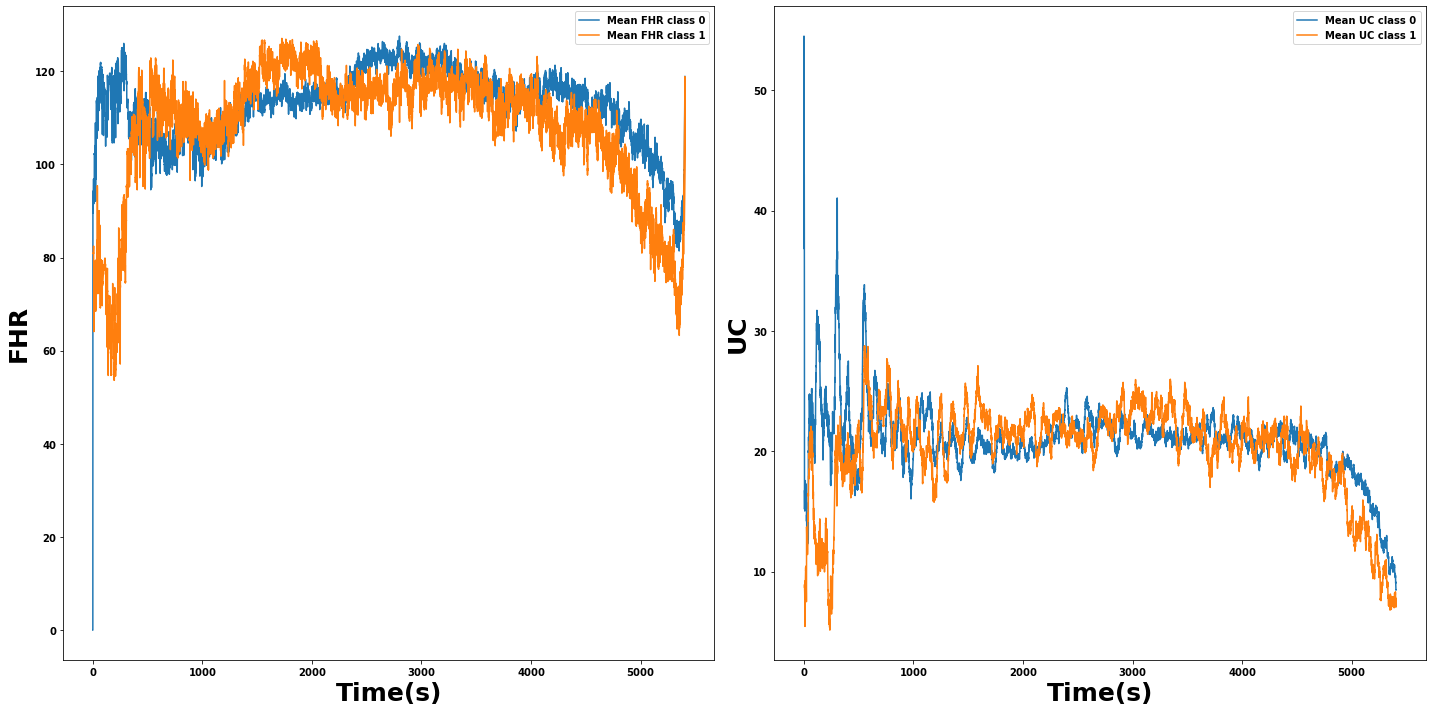

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

ax[0].plot(fhr[y == 0].mean().index, fhr[y == 0].mean().values, label='Mean FHR class 0')
ax[0].plot(fhr[y == 1].mean().index, fhr[y == 1].mean().values, label='Mean FHR class 1')
ax[1].plot(uc[y == 0].mean().index, uc[y == 0].mean().values, label='Mean UC class 0')
ax[1].plot(uc[y == 1].mean().index, uc[y == 1].mean().values, label='Mean UC class 1')

ax[0].set_xlabel('Time(s)', fontsize=25)
ax[1].set_xlabel('Time(s)', fontsize=25)
ax[0].set_ylabel('FHR', fontsize=25)
ax[1].set_ylabel('UC', fontsize=25)
ax[0].legend()
ax[1].legend()
fig.tight_layout()
plt.savefig(f"{paths.ORIGINAL_DATA_PLOTS}/Means_plots.pdf")
plt.savefig(f"{paths.ORIGINAL_DATA_PLOTS}/Means_plots.png")


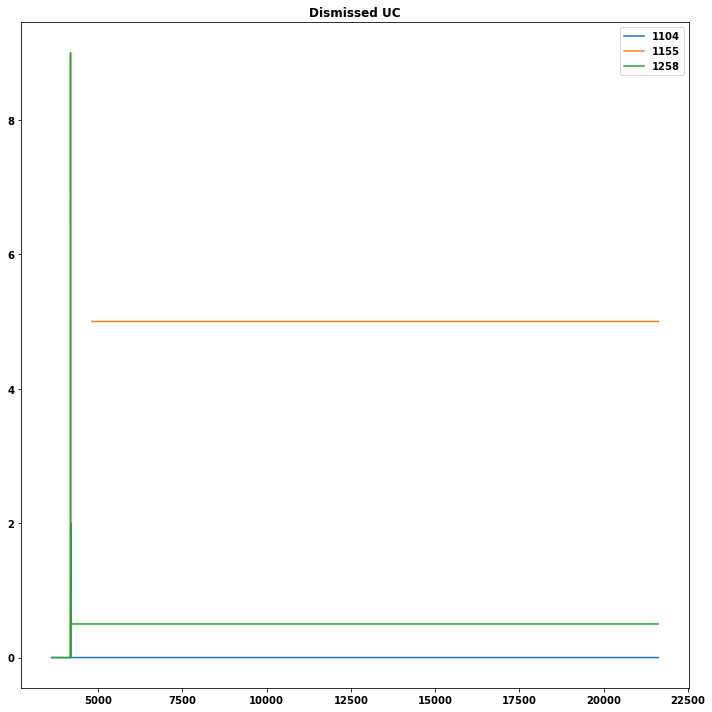

In [8]:
"""
Abnormal data based on an old criteria non obective non used anymore


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
for uc_idx in [1104, 1155, 1258]:
    ax.plot(uc.loc[uc_idx].values, label=uc_idx)
ax.set_title('Dismissed UC')
ax.legend()
fig.tight_layout()
plt.savefig(f"{paths.ORIGINAL_DATA_PLOTS}/Dismissed_uc.pdf")
plt.savefig(f"{paths.ORIGINAL_DATA_PLOTS}/Dismissed_uc.png")
"""


KeyboardInterrupt



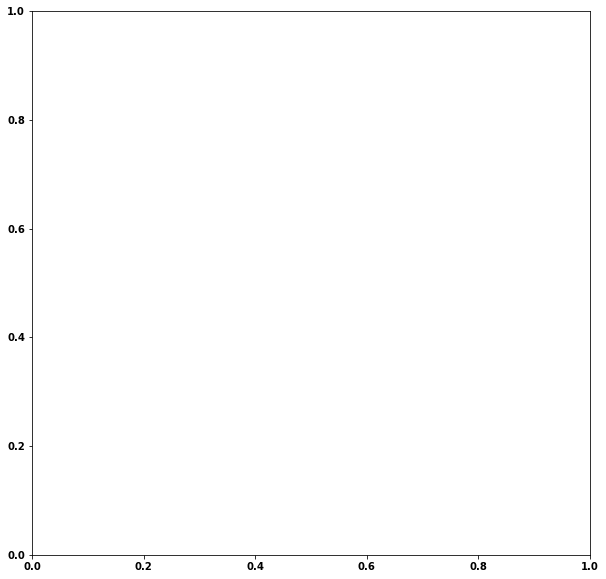

In [9]:
'''
To plot all uc DO NOT RUN it takes all ram

for idx, row in uc.copy().iterrows():
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    uc_signal = uc.copy().loc[idx].values
    uc_signal[uc_signal == 0] = np.nan

    color = 'red' if y[idx] == 1 else 'blue'

    ax.plot(uc.columns.to_numpy(), uc_signal, color=color)
    ax.set_title(f"{idx}")
    ax.set_xlim((0, 5405))
    plt.savefig(f'{idx}.png')
    del fig
    del ax
    del uc_signal
    plt.close()
'''

In [ ]:
'''
To plot all FHR DO NOT RUN it takes all ram

for idx, row in fhr.copy().iterrows():
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    fhr_signal = fhr.copy().loc[idx].values
    fhr_signal[(fhr_signal == 0) | (fhr_signal >= 250)] = np.nan

    color = 'red' if y[idx] == 1 else 'blue'

    ax.plot(fhr .columns.to_numpy(), fhr_signal, color=color)
    ax.set_title(f"{idx}")
    ax.set_xlim((0, 5405))
    plt.savefig(f'fhr_{idx}.png')
    del fig
    del ax
    del fhr_signal
    plt.close()'''

In [4]:
uc_no_extremes = uc.copy()
uc_no_extremes[uc_no_extremes == 0] = np.nan
constant_shapes_no_extremes =  uc_no_extremes.apply(lambda x: pd_utils.constant_size(x.values, threshold=4*5), axis=1)

In [5]:
abnormal_uc_curves_data = (constant_shapes_no_extremes + (uc == 0).sum(axis=1)).sort_values(ascending=False).head(14).sort_index()
abnormal_uc_curves_data

1104    18000.0
1119    14757.0
1130    15634.0
1134    14770.0
1149    16530.0
1155    16800.0
1158    18079.0
1186    14544.0
1188    15588.0
1258    17969.0
1327    16303.0
1376    15682.0
1451    16062.0
1477    14611.0
dtype: float64

In [6]:
abnormal_uc_curves = abnormal_uc_curves_data.index.to_numpy()
y[abnormal_uc_curves].value_counts()

1    8
0    6
Name: ph, dtype: int64

In [13]:
uc_clean = uc.copy()
uc_clean = uc_clean.drop(abnormal_uc_curves)
uc_clean[uc_clean <= 0] = np.nan

fhr_clean = fhr.copy()
fhr_clean = fhr_clean.drop(abnormal_uc_curves)
fhr_clean[(fhr_clean <= 0) | (fhr_clean >= 250)] = np.nan

y_clean = y.drop(abnormal_uc_curves)

uc_clean.shape, fhr_clean.shape, y_clean.shape

((538, 21620), (538, 21620), (538,))

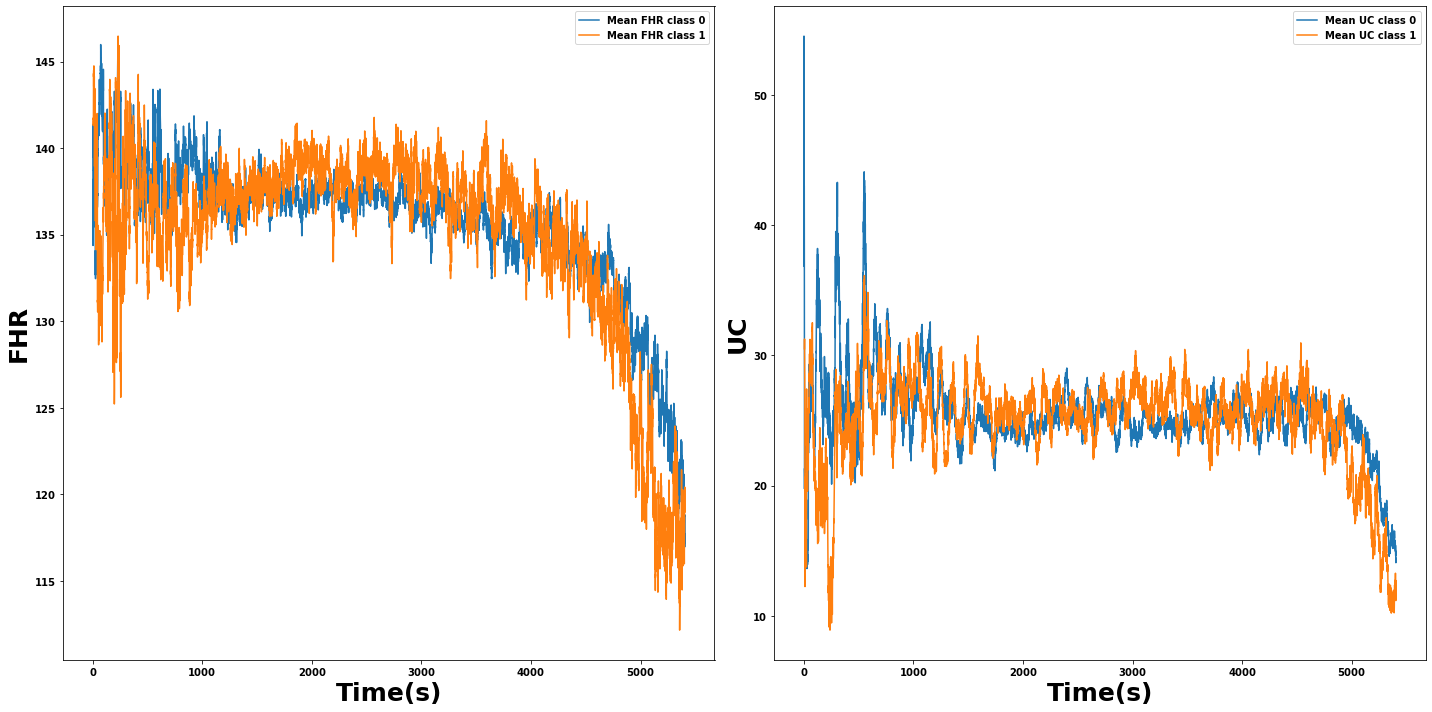

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

ax[0].plot(fhr_clean[y_clean == 0].mean().index, fhr_clean[y_clean == 0].mean().values, label='Mean FHR class 0')
ax[0].plot(fhr_clean[y_clean == 1].mean().index, fhr_clean[y_clean == 1].mean().values, label='Mean FHR class 1')
ax[1].plot(uc_clean[y_clean == 0].mean().index, uc_clean[y_clean == 0].mean().values, label='Mean UC class 0')
ax[1].plot(uc_clean[y_clean == 1].mean().index, uc_clean[y_clean == 1].mean().values, label='Mean UC class 1')

ax[0].set_xlabel('Time(s)', fontsize=25)
ax[1].set_xlabel('Time(s)', fontsize=25)
ax[0].set_ylabel('FHR', fontsize=25)
ax[1].set_ylabel('UC', fontsize=25)
ax[0].legend()
ax[1].legend()
fig.tight_layout()

plt.savefig(f"{paths.ORIGINAL_DATA_PLOTS}/Means_plots_clean.pdf")
plt.savefig(f"{paths.ORIGINAL_DATA_PLOTS}/Means_plots_clean.png")

In [15]:
first_valid_index_uc = uc_clean.apply(pd.Series.first_valid_index, axis=1)
first_valid_index_fhr = fhr_clean.apply(pd.Series.first_valid_index, axis=1)

first_valid_index_uc.idxmax(), (uc_clean.columns.max() - first_valid_index_uc.max()) / 60,\
first_valid_index_fhr.idxmax(), (fhr_clean.columns.max() - first_valid_index_fhr.max()) / 60

(2025, 41.22083333333333, 2025, 41.19583333333333)

In [16]:
uc_cut = uc_clean.copy()
uc_cut = uc_cut.iloc[:, -40 * 60 * 4:]

fhr_cut = fhr_clean.copy()
fhr_cut = fhr_cut.iloc[:, -40 * 60 * 4:]

y_cut = y_clean.copy()

uc_cut.shape, fhr_cut.shape, y_cut.shape

((538, 9600), (538, 9600), (538,))

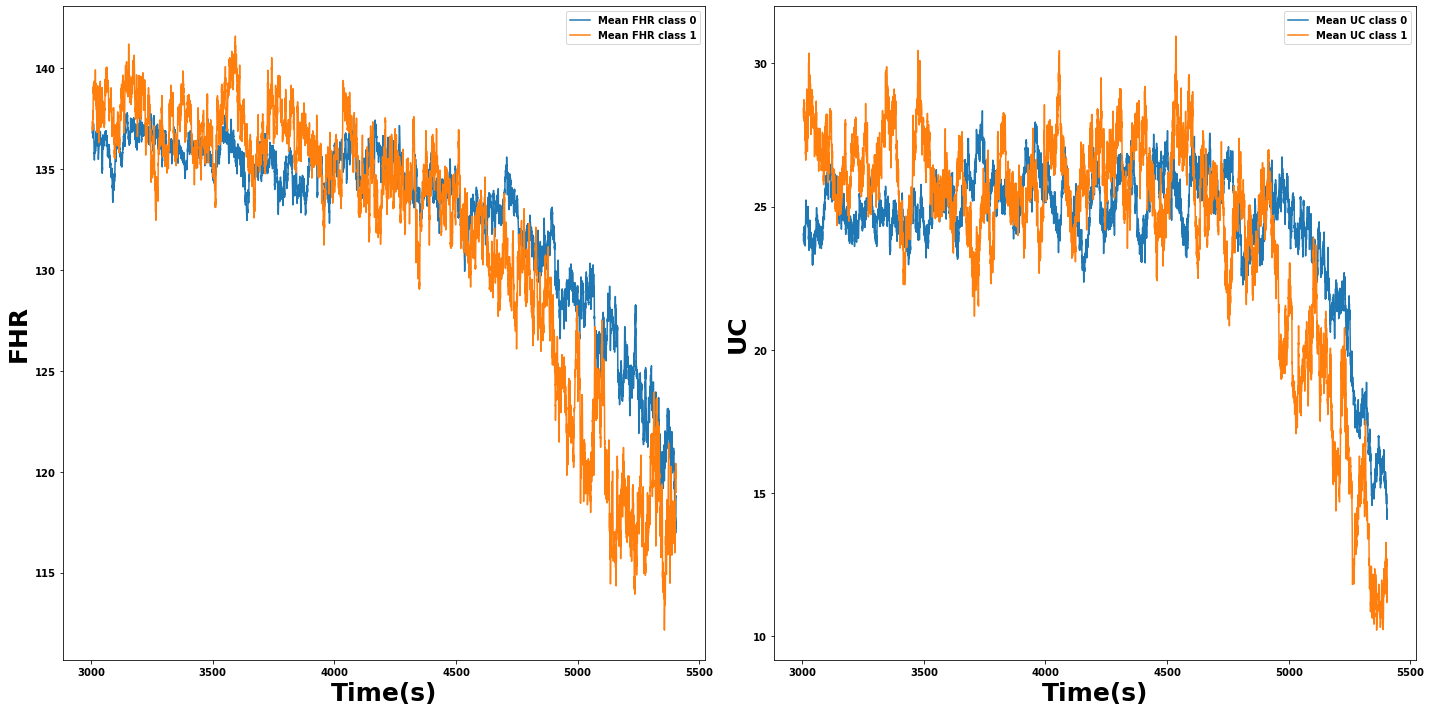

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

ax[0].plot(fhr_cut[y_cut == 0].mean().index, fhr_cut[y_cut == 0].mean().values, label='Mean FHR class 0')
ax[0].plot(fhr_cut[y_cut == 1].mean().index, fhr_cut[y_cut == 1].mean().values, label='Mean FHR class 1')
ax[1].plot(uc_cut[y_cut == 0].mean().index, uc_cut[y_cut == 0].mean().values, label='Mean UC class 0')
ax[1].plot(uc_cut[y_cut == 1].mean().index, uc_cut[y_cut == 1].mean().values, label='Mean UC class 1')

ax[0].set_xlabel('Time(s)', fontsize=25)
ax[1].set_xlabel('Time(s)', fontsize=25)
ax[0].set_ylabel('FHR', fontsize=25)
ax[1].set_ylabel('UC', fontsize=25)
ax[0].legend()
ax[1].legend()
fig.tight_layout()

plt.savefig(f"{paths.ORIGINAL_DATA_PLOTS}/Means_plots_clean_cut.pdf")
plt.savefig(f"{paths.ORIGINAL_DATA_PLOTS}/Means_plots_clean_cut.png")

In [18]:
uc_cut.to_csv(f"{paths.CLEAN_CUT_DATA_PATH}/uc.csv")
fhr_cut.to_csv(f"{paths.CLEAN_CUT_DATA_PATH}/fhr.csv")
y_cut.to_csv(f"{paths.CLEAN_CUT_DATA_PATH}/y.csv")

uc_cut.to_pickle(f"{paths.CLEAN_CUT_DATA_PATH}/uc.pickle")
fhr_cut.to_pickle(f"{paths.CLEAN_CUT_DATA_PATH}/fhr.pickle")
y_cut.to_pickle(f"{paths.CLEAN_CUT_DATA_PATH}/y.pickle")

In [19]:
test_fhr = pd.read_csv(f"{paths.CLEAN_CUT_DATA_PATH}/fhr.csv", index_col=0)
test_uc = pd.read_csv(f"{paths.CLEAN_CUT_DATA_PATH}/uc.csv", index_col=0)
test_y = pd.read_csv(f"{paths.CLEAN_CUT_DATA_PATH}/y.csv", index_col=0, squeeze=True)

test_fhr.columns = test_fhr.columns.astype('float64')
test_uc.columns = test_uc.columns.astype('float64')

test_fhr_pickle = pd.read_pickle(f"{paths.CLEAN_CUT_DATA_PATH}/fhr.pickle")
test_uc_pickle = pd.read_pickle(f"{paths.CLEAN_CUT_DATA_PATH}/uc.pickle")
test_y_pickle = pd.read_pickle(f"{paths.CLEAN_CUT_DATA_PATH}/y.pickle")

print(f"{test_fhr_pickle.equals(test_fhr)}")
print(f"{test_uc_pickle.equals(test_uc)}")
print(f"{test_y_pickle.equals(test_y)}")

True
True
True


In [37]:
nan_porcentage = ((uc_cut.isna().sum(axis=1) / uc_cut.apply(lambda x: len(x), axis=1))*100)
nan_porcentage[nan_porcentage > 50].sort_values(ascending=False)

1058    99.489583
1318    98.937500
1296    87.000000
1009    84.427083
1322    81.583333
1137    79.145833
1463    78.750000
1277    76.864583
1105    76.104167
1386    75.791667
1292    75.645833
1043    72.583333
1140    72.583333
1355    72.125000
1377    70.906250
1448    65.968750
1291    64.958333
1054    64.927083
1042    63.343750
1004    63.187500
1321    63.114583
1209    62.447917
1300    62.364583
1217    60.552083
1324    60.041667
1203    59.062500
1272    58.333333
1072    58.156250
1325    57.677083
1383    57.395833
1276    57.041667
1108    56.927083
1006    55.875000
1365    55.614583
1479    55.427083
1173    55.270833
1227    54.697917
1111    52.750000
1431    51.625000
1171    51.270833
1284    50.239583
1266    50.083333
2028    50.041667
dtype: float64

(2905.0, 5504.75)

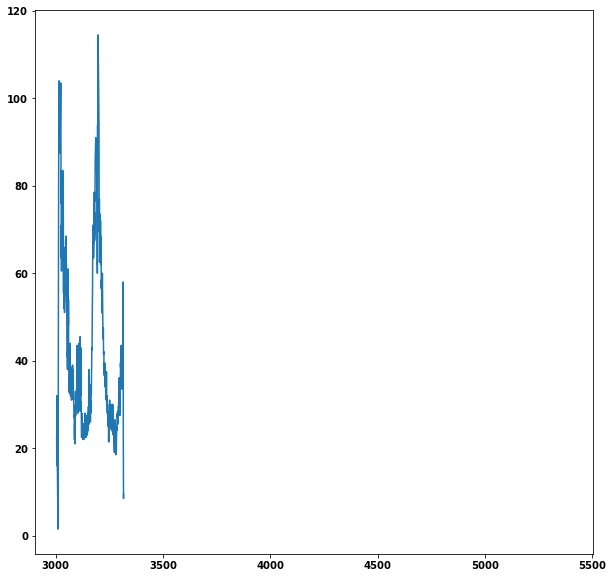

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
uc_cut.loc[1296].plot()
ax.set_xlim((uc_cut.columns.min()-100, uc_cut.columns.max() + 100))